In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

In [2]:
def normalize_confusion_matrix(cm: np.ndarray) -> np.ndarray:
	div = cm.sum(axis = 1, keepdims = True)
	div = np.where(div > 0, div, 1)
	return cm / div


def assign_periods(df: pd.DataFrame, period_days: int) -> pd.DataFrame:
	def calculate_period_start(rec_time, min_date):
		period_offset = (rec_time.date() - min_date).days // period_days
		return min_date + timedelta(days = period_days * period_offset)

	period_df = pd.DataFrame()

	for brood in df['brood_id'].unique():
		brood_df = df[df['brood_id'] == brood]
		brood_min_date = brood_df['datetime'].min().date()
		brood_df['period_start'] = brood_df['datetime'].apply(lambda dt: calculate_period_start(dt, brood_min_date))
		period_df = pd.concat([period_df, brood_df])

	return period_df

# Test data preparation

In [3]:
rec_df = pd.read_csv('_data/snowfinch-recordings.csv')
rec_df['datetime'] = pd.to_datetime(rec_df['datetime'])
rec_df

,rec_path,brood_id,datetime,age_min,age_max,brood_size
0,2022/AT_Grossglockner/12_1_1_22/12_1_1_22_2206...,12_1_1_22,2022-06-25 09:00:01,4.0,5.0,3
1,2022/AT_Grossglockner/12_1_1_22/12_1_1_22_2206...,12_1_1_22,2022-06-22 17:00:00,1.0,2.0,4
2,2022/AT_Grossglockner/12_1_1_22/12_1_1_22_2206...,12_1_1_22,2022-06-26 06:00:00,5.0,6.0,3
3,2022/AT_Grossglockner/12_1_1_22/12_1_1_22_2206...,12_1_1_22,2022-06-22 07:19:15,1.0,2.0,4
4,2022/AT_Grossglockner/12_1_1_22/12_1_1_22_2206...,12_1_1_22,2022-06-25 18:00:00,4.0,5.0,3
...,...,...,...,...,...,...
4188,2022/Switzerland/Furka13_22a/22_06_20/20220617...,Furka13_22a,2022-06-17 17:30:00,19.0,20.0,5
4189,2022/Switzerland/Furka13_22a/22_06_20/20220618...,Furka13_22a,2022-06-18 13:30:00,20.0,21.0,5
4190,2022/Switzerland/Furka13_22a/22_06_20/20220617...,Furka13_22a,2022-06-17 05:30:00,19.0,20.0,5
4191,2022/Switzerland/Furka13_22a/22_06_20/20220616...,Furka13_22a,2022-06-16 20:30:00,18.0,19.0,5


In [4]:
f10_start = datetime(2022, 6, 7)
f10_end = datetime(2022, 6, 11)
f10_idx = (rec_df['brood_id'] == 'Furka10_22a') & (rec_df['datetime'] >= f10_start) & (rec_df['datetime'] < f10_end)

f12_start = datetime(2022, 7, 16)
f12_end = datetime(2022, 7, 20)
f12_idx = (rec_df['brood_id'] == 'Furka12_22a') & (rec_df['datetime'] >= f12_start) & (rec_df['datetime'] < f12_end)

test_df = rec_df[f10_idx | f12_idx].reset_index().drop(columns = 'index')
test_df = assign_periods(test_df, period_days = 2)
test_df

/tmp/ipykernel_909/4081892371.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brood_df['period_start'] = brood_df['datetime'].apply(lambda dt: calculate_period_start(dt, brood_min_date))
/tmp/ipykernel_909/4081892371.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brood_df['period_start'] = brood_df['datetime'].apply(lambda dt: calculate_period_start(dt, brood_min_date))


,rec_path,brood_id,datetime,age_min,age_max,brood_size,period_start
0,2022/Switzerland/Furka10_22a/22_06_14/20220610...,Furka10_22a,2022-06-10 15:30:00,10.0,10.0,4,2022-06-09
1,2022/Switzerland/Furka10_22a/22_06_14/20220610...,Furka10_22a,2022-06-10 21:30:00,10.0,10.0,4,2022-06-09
2,2022/Switzerland/Furka10_22a/22_06_14/20220610...,Furka10_22a,2022-06-10 14:30:00,10.0,10.0,4,2022-06-09
3,2022/Switzerland/Furka10_22a/22_06_14/20220610...,Furka10_22a,2022-06-10 12:30:00,10.0,10.0,4,2022-06-09
4,2022/Switzerland/Furka10_22a/22_06_14/20220610...,Furka10_22a,2022-06-10 16:30:00,10.0,10.0,4,2022-06-09
...,...,...,...,...,...,...,...
124,2022/Switzerland/Furka12_22a/22_07_19/20220717...,Furka12_22a,2022-07-17 18:30:00,2.0,5.0,5,2022-07-17
125,2022/Switzerland/Furka12_22a/22_07_19/20220719...,Furka12_22a,2022-07-19 05:30:00,4.0,7.0,5,2022-07-19
126,2022/Switzerland/Furka12_22a/22_07_19/20220717...,Furka12_22a,2022-07-17 15:30:00,2.0,5.0,5,2022-07-17
127,2022/Switzerland/Furka12_22a/22_07_19/20220718...,Furka12_22a,2022-07-18 11:30:00,3.0,6.0,5,2022-07-17


# Brood size

In [5]:
size_test_df = test_df.drop(columns = ['age_min', 'age_max', 'datetime'])

size_test_df['brood_size'] = size_test_df['brood_size'].astype('category')
size_test_df['brood_size'] = size_test_df['brood_size'].cat.set_categories([2, 3, 4, 5])

size_1hot = pd.get_dummies(size_test_df['brood_size'])
size_test_df = pd.concat([size_test_df.drop(columns = 'brood_size'), size_1hot.astype('int')], axis = 1)
size_test_df

,rec_path,brood_id,period_start,2,3,4,5
0,2022/Switzerland/Furka10_22a/22_06_14/20220610...,Furka10_22a,2022-06-09,0,0,1,0
1,2022/Switzerland/Furka10_22a/22_06_14/20220610...,Furka10_22a,2022-06-09,0,0,1,0
2,2022/Switzerland/Furka10_22a/22_06_14/20220610...,Furka10_22a,2022-06-09,0,0,1,0
3,2022/Switzerland/Furka10_22a/22_06_14/20220610...,Furka10_22a,2022-06-09,0,0,1,0
4,2022/Switzerland/Furka10_22a/22_06_14/20220610...,Furka10_22a,2022-06-09,0,0,1,0
...,...,...,...,...,...,...,...
124,2022/Switzerland/Furka12_22a/22_07_19/20220717...,Furka12_22a,2022-07-17,0,0,0,1
125,2022/Switzerland/Furka12_22a/22_07_19/20220719...,Furka12_22a,2022-07-19,0,0,0,1
126,2022/Switzerland/Furka12_22a/22_07_19/20220717...,Furka12_22a,2022-07-17,0,0,0,1
127,2022/Switzerland/Furka12_22a/22_07_19/20220718...,Furka12_22a,2022-07-17,0,0,0,1


In [6]:
agg_map = { 'rec_path': 'count' }
for bs in [2, 3, 4, 5]:
	agg_map[bs] = 'sum'

size_test_agg = size_test_df.groupby(['brood_id', 'period_start']).agg(agg_map).reset_index()
size_test_agg = size_test_agg.rename(columns = { 'rec_path': 'rec_count' })

for bs in [2, 3, 4, 5]:
	size_test_agg[bs] = np.where(size_test_agg[bs] / size_test_agg['rec_count'] > 0.8, 1, 0)

size_test_agg

,brood_id,period_start,rec_count,2,3,4,5
0,Furka10_22a,2022-06-07,37,0,0,1,0
1,Furka10_22a,2022-06-09,37,0,0,1,0
2,Furka12_22a,2022-07-17,36,0,0,0,1
3,Furka12_22a,2022-07-19,19,0,0,0,1


In [7]:
size_pred_df = pd.read_csv('_out/bs-pred.csv')
size_pred_df['datetime'] = pd.to_datetime(size_pred_df['datetime'])
size_pred_df = assign_periods(size_pred_df, period_days = 2)
size_pred_df

/tmp/ipykernel_909/4081892371.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brood_df['period_start'] = brood_df['datetime'].apply(lambda dt: calculate_period_start(dt, brood_min_date))
/tmp/ipykernel_909/4081892371.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brood_df['period_start'] = brood_df['datetime'].apply(lambda dt: calculate_period_start(dt, brood_min_date))


,rec_path,n_samples,duration,2_n_samples,3_n_samples,4_n_samples,5_n_samples,brood_id,datetime,2_score,3_score,4_score,5_score,period_start
0,home/gardzielb/test/Furka10_22a/22_06_10/20220...,86,172.0,0,65,9,12,Furka10_22a,2022-06-07 16:30:00,0.000000,0.755814,0.104651,0.139535,2022-06-07
1,home/gardzielb/test/Furka10_22a/22_06_10/20220...,184,368.0,6,117,28,33,Furka10_22a,2022-06-08 12:30:00,0.032609,0.635870,0.152174,0.179348,2022-06-07
2,home/gardzielb/test/Furka10_22a/22_06_10/20220...,142,284.0,15,103,11,13,Furka10_22a,2022-06-09 12:30:00,0.105634,0.725352,0.077465,0.091549,2022-06-09
3,home/gardzielb/test/Furka10_22a/22_06_10/20220...,171,342.0,8,100,21,42,Furka10_22a,2022-06-10 10:30:00,0.046784,0.584795,0.122807,0.245614,2022-06-09
4,home/gardzielb/test/Furka10_22a/22_06_10/20220...,22,44.0,5,10,2,5,Furka10_22a,2022-06-10 11:30:00,0.227273,0.454545,0.090909,0.227273,2022-06-09
5,home/gardzielb/test/Furka12_22a/22_07_19/20220...,101,202.0,3,88,9,1,Furka12_22a,2022-07-17 11:30:00,0.029703,0.871287,0.089109,0.009901,2022-07-17
6,home/gardzielb/test/Furka12_22a/22_07_19/20220...,94,188.0,5,78,10,1,Furka12_22a,2022-07-18 12:30:00,0.053191,0.829787,0.106383,0.010638,2022-07-17
7,home/gardzielb/test/Furka12_22a/22_07_19/20220...,249,498.0,14,184,43,8,Furka12_22a,2022-07-18 13:30:00,0.056225,0.738956,0.172691,0.032129,2022-07-17
8,home/gardzielb/test/Furka12_22a/22_07_19/20220...,23,46.0,0,16,4,3,Furka12_22a,2022-07-19 11:30:00,0.000000,0.695652,0.173913,0.130435,2022-07-19


In [17]:
agg_map = { 'rec_path': 'count' }
test_cols = ['rec_path', 'brood_id', 'period_start']

for col in size_pred_df.columns:
	if 'n_samples' in col:
		test_cols.append(col)
		agg_map[col] = 'sum'

size_pred_agg = size_pred_df[test_cols].groupby(['brood_id', 'period_start']).agg(agg_map).reset_index()
size_pred_agg = size_pred_agg.rename(columns = { 'rec_path': 'rec_count' })

for bs in [2, 3, 4, 5]:
	size_pred_agg[bs] = size_pred_df[f'{bs}_n_samples'] / size_pred_df['n_samples']

for bs in [2, 3, 4, 5]:
	bs_max = size_pred_agg[[2, 3, 4, 5]].idxmax(axis = 1)
	size_pred_agg[bs] = np.where(bs_max == bs, 1, 0)

size_pred_agg

,brood_id,period_start,rec_count,n_samples,2_n_samples,3_n_samples,4_n_samples,5_n_samples,2,3,4,5
0,Furka10_22a,2022-06-07,2,270,6,182,37,45,0,1,0,0
1,Furka10_22a,2022-06-09,3,335,28,213,34,60,0,1,0,0
2,Furka12_22a,2022-07-17,3,444,22,350,62,10,0,1,0,0
3,Furka12_22a,2022-07-19,1,23,0,16,4,3,0,1,0,0


In [18]:
size_pred_agg = size_pred_agg.drop(index = 0)
size_pred_agg

,brood_id,period_start,rec_count,n_samples,2_n_samples,3_n_samples,4_n_samples,5_n_samples,2,3,4,5
1,Furka10_22a,2022-06-09,3,335,28,213,34,60,0,1,0,0
2,Furka12_22a,2022-07-17,3,444,22,350,62,10,0,1,0,0
3,Furka12_22a,2022-07-19,1,23,0,16,4,3,0,1,0,0


In [19]:
from sfw_brood.validation import generate_validation_results

generate_validation_results(
	test_df = size_test_agg[[2, 3, 4, 5]],
	pred_df = size_pred_agg[[2, 3, 4, 5]],
	classes = [2, 3, 4, 5],
	target_label = 'brood size',
	output = 'show',
	multi_target = False
)

y_true = 0    4
1    4
2    5
3    5
dtype: int64
y_pred = 1    3
2    3
3    3
dtype: int64


ValueError: Found input variables with inconsistent numbers of samples: [4, 3]

# Brood age

In [10]:
from sfw_brood.preprocessing import group_ages

/home/bartosz/oss-venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
age_test_df, age_group_labels = group_ages(
	test_df.rename(columns = { 'age_min': 'class_min', 'age_max': 'class_max' }),
	groups = [(0, 5.5), (6, 8.5), (9, 11.5), (12, 14.5), (15, 30)],
	multi_target = True
)
age_test_df = age_test_df.drop(columns = ['datetime', 'age_min', 'age_max'])
age_test_df

,rec_path,brood_id,brood_size,period_start,00.0-05.5,06.0-08.5,09.0-11.5,12.0-14.5,15.0-30.0
0,2022/Switzerland/Furka10_22a/22_06_14/20220610...,Furka10_22a,4,2022-06-09,0.0,0.0,1.0,0.0,0.0
1,2022/Switzerland/Furka10_22a/22_06_14/20220610...,Furka10_22a,4,2022-06-09,0.0,0.0,1.0,0.0,0.0
2,2022/Switzerland/Furka10_22a/22_06_14/20220610...,Furka10_22a,4,2022-06-09,0.0,0.0,1.0,0.0,0.0
3,2022/Switzerland/Furka10_22a/22_06_14/20220610...,Furka10_22a,4,2022-06-09,0.0,0.0,1.0,0.0,0.0
4,2022/Switzerland/Furka10_22a/22_06_14/20220610...,Furka10_22a,4,2022-06-09,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
124,2022/Switzerland/Furka12_22a/22_07_19/20220717...,Furka12_22a,5,2022-07-17,1.0,0.0,0.0,0.0,0.0
125,2022/Switzerland/Furka12_22a/22_07_19/20220719...,Furka12_22a,5,2022-07-19,1.0,1.0,0.0,0.0,0.0
126,2022/Switzerland/Furka12_22a/22_07_19/20220717...,Furka12_22a,5,2022-07-17,1.0,0.0,0.0,0.0,0.0
127,2022/Switzerland/Furka12_22a/22_07_19/20220718...,Furka12_22a,5,2022-07-17,1.0,1.0,0.0,0.0,0.0


In [12]:
agg_map = { 'rec_path': 'count' }
for age_group in age_group_labels:
	agg_map[age_group] = 'sum'

age_test_agg = age_test_df.groupby(['brood_id', 'period_start']).agg(agg_map).reset_index()
age_test_agg = age_test_agg.rename(columns = { 'rec_path': 'rec_count' })

for age_group in age_group_labels:
	age_test_agg[age_group] = np.where(age_test_agg[age_group] / age_test_agg['rec_count'] > 0.3, 1, 0)

age_test_agg

,brood_id,period_start,rec_count,00.0-05.5,06.0-08.5,09.0-11.5,12.0-14.5,15.0-30.0
0,Furka10_22a,2022-06-07,37,0,1,0,0,0
1,Furka10_22a,2022-06-09,37,0,0,1,0,0
2,Furka12_22a,2022-07-17,36,1,1,0,0,0
3,Furka12_22a,2022-07-19,19,1,1,0,0,0


In [13]:
age_pred_df = pd.read_csv('_out/ba-pred.csv')
age_pred_df['datetime'] = pd.to_datetime(age_pred_df['datetime'])
age_pred_df = assign_periods(age_pred_df, period_days = 2)
age_pred_df

/tmp/ipykernel_909/4081892371.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brood_df['period_start'] = brood_df['datetime'].apply(lambda dt: calculate_period_start(dt, brood_min_date))
/tmp/ipykernel_909/4081892371.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brood_df['period_start'] = brood_df['datetime'].apply(lambda dt: calculate_period_start(dt, brood_min_date))


,rec_path,n_samples,duration,00.0-05.5_n_samples,09.0-11.5_n_samples,15.0-30.0_n_samples,06.0-08.5_n_samples,12.0-14.5_n_samples,brood_id,datetime,00.0-05.5_score,09.0-11.5_score,15.0-30.0_score,06.0-08.5_score,12.0-14.5_score,period_start
0,home/gardzielb/test/Furka10_22a/22_06_10/20220...,86,172.0,0,1,0,50,0,Furka10_22a,2022-06-07 16:30:00,0.000000,0.011628,0.000000,0.581395,0.0,2022-06-07
1,home/gardzielb/test/Furka10_22a/22_06_10/20220...,184,368.0,1,51,0,60,0,Furka10_22a,2022-06-08 12:30:00,0.005435,0.277174,0.000000,0.326087,0.0,2022-06-07
2,home/gardzielb/test/Furka10_22a/22_06_10/20220...,142,284.0,0,78,0,1,0,Furka10_22a,2022-06-09 12:30:00,0.000000,0.549296,0.000000,0.007042,0.0,2022-06-09
3,home/gardzielb/test/Furka10_22a/22_06_10/20220...,171,342.0,0,70,1,0,0,Furka10_22a,2022-06-10 10:30:00,0.000000,0.409357,0.005848,0.000000,0.0,2022-06-09
4,home/gardzielb/test/Furka10_22a/22_06_10/20220...,22,44.0,0,12,1,0,0,Furka10_22a,2022-06-10 11:30:00,0.000000,0.545455,0.045455,0.000000,0.0,2022-06-09
5,home/gardzielb/test/Furka12_22a/22_07_19/20220...,101,202.0,91,0,0,1,0,Furka12_22a,2022-07-17 11:30:00,0.900990,0.000000,0.000000,0.009901,0.0,2022-07-17
6,home/gardzielb/test/Furka12_22a/22_07_19/20220...,94,188.0,60,0,0,1,0,Furka12_22a,2022-07-18 12:30:00,0.638298,0.000000,0.000000,0.010638,0.0,2022-07-17
7,home/gardzielb/test/Furka12_22a/22_07_19/20220...,249,498.0,152,0,0,7,0,Furka12_22a,2022-07-18 13:30:00,0.610442,0.000000,0.000000,0.028112,0.0,2022-07-17
8,home/gardzielb/test/Furka12_22a/22_07_19/20220...,23,46.0,15,0,0,0,0,Furka12_22a,2022-07-19 11:30:00,0.652174,0.000000,0.000000,0.000000,0.0,2022-07-19


In [14]:
agg_map = { 'rec_path': 'count' }
test_cols = ['rec_path', 'brood_id', 'period_start']

for col in age_pred_df.columns:
	if 'n_samples' in col:
		test_cols.append(col)
		agg_map[col] = 'sum'

age_pred_agg = age_pred_df[test_cols].groupby(['brood_id', 'period_start']).agg(agg_map).reset_index()
age_pred_agg = age_pred_agg.rename(columns = { 'rec_path': 'rec_count' })

for age_group in age_group_labels:
	age_pred_agg[age_group] = np.where(age_pred_agg[f'{age_group}_n_samples'] / age_pred_agg['n_samples'] > 0.3, 1, 0)

age_pred_agg

,brood_id,period_start,rec_count,n_samples,00.0-05.5_n_samples,09.0-11.5_n_samples,15.0-30.0_n_samples,06.0-08.5_n_samples,12.0-14.5_n_samples,00.0-05.5,06.0-08.5,09.0-11.5,12.0-14.5,15.0-30.0
0,Furka10_22a,2022-06-07,2,270,1,52,0,110,0,0,1,0,0,0
1,Furka10_22a,2022-06-09,3,335,0,160,2,1,0,0,0,1,0,0
2,Furka12_22a,2022-07-17,3,444,303,0,0,9,0,1,0,0,0,0
3,Furka12_22a,2022-07-19,1,23,15,0,0,0,0,1,0,0,0,0


Generating classification report and confusion matrix


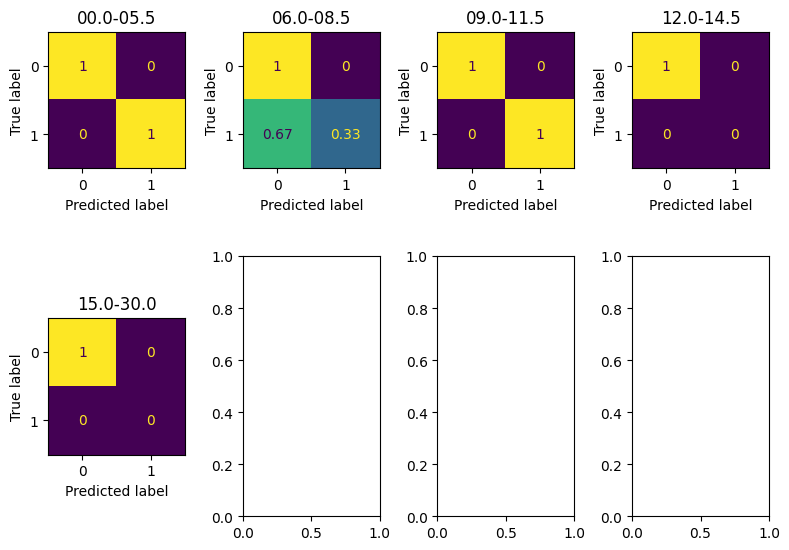

{'subset_accuracy': 0.5, 'label_ranking_precision': 0.8500000000000001}
Classification report and confusion matrix saved to show


{'subset_accuracy': 0.5, 'label_ranking_precision': 0.8500000000000001}

In [15]:
generate_validation_results(
	test_df = age_test_agg[age_group_labels],
	pred_df = age_pred_agg[age_group_labels],
	classes = age_group_labels,
	target_label = 'brood age',
	output = 'show',
	multi_target = True
)